# Propose a set of intensity-slicing transformation functions capable of producing all the individual bit planes if an 8-bit monochrome image.

In [2]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

In [3]:
img = cv2.imread("dollar.tif", 0)

In [4]:
# creating a transformation function to get the most significant bit plane 
def T_r_8(r):
    if r > 2**(7): 
        return 1 
    else:
        return 0

# need to vectorize it 
T_r_8_vec = np.vectorize(T_r_8)

In [5]:
bit_8 = T_r_8_vec(img)

In [6]:
bit_8

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

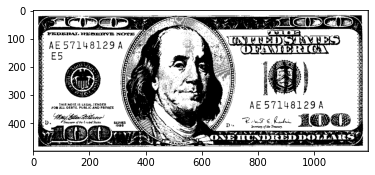

In [7]:
plt.imshow(bit_8, cmap="gray")

Creating some test values so we can test our function

In [8]:
list_values = [112, 255, 100, 60, 190]

for val in list_values:
    print("{} -> {}".format(val, T_r_8(val)))

112 -> 0
255 -> 1
100 -> 0
60 -> 0
190 -> 1


Now, writing a simimar funciton 

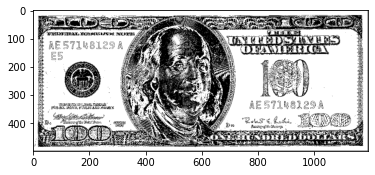

In [13]:
plt.imshow(bit_planes_dict['bit_plane_7'], cmap="gray")

In [14]:
def T_r_7(r):
    val = r - T_r_8(r)*2**7
    if val > 2**6: 
        return 1 
    else:
        return 0
    
T_r_7_vec = np.vectorize(T_r_7)

In [15]:
list_values = [112, 255, 100, 60, 190]

for val in list_values:
    print("{} -> {}".format(val, T_r_7(val)))

112 -> 1
255 -> 1
100 -> 1
60 -> 0
190 -> 0


In [16]:
bit_7 = T_r_7_vec(img)

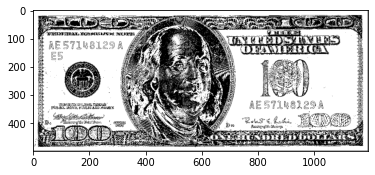

In [17]:
plt.imshow(bit_7, cmap="gray")

Above we wrote the functions to get the most significant bit, and the 7th bit plane, similarly, we can write 8 different functions to extract the different bit planes.

# How many intensity transformation functions would be there for 16-bit images?

For 16 bit images, there would be 16 unique functions (according to the logic that I have followed here).

# Is the basic approach in (a) limited to images in which the number of intensity levels is an integer power of 2, or is the method general for any number of integer intensity levels?

The method that I have used above will worl only for the images in which the intensity levels are power of 2. 

# If the method is general, how would it be different from your approach?

We need to add a new argument, which would represent the base we would be using, and accordingly we need to modify the function. 

(Hope this makes sense)